# Reproducible Reproduce on Customer Churn Data ~ From R to Python

We will be reproducing this project from R to Python wherein we will be doing Data analysis and create a model to predict the customer churn. Link to R project https://www.kaggle.com/code/rankirsh/do-you-feel-the-churn-visualisation-prediction . 

The project will be sub-divided into steps:
- Introduction and description of data
- Identifying relationships
- 
-
-
-
-


We will further improve this study by :
- Since our dataset has many predicting variables *(21)*, therefore we will identify the predictive power of the variables and selecting variables with a high predictive power to be used in our model. To achieve this we will use **Univariate Analysis technique** which analyzes the relationship between each individual variable and the target variable to assess the significance of the relationship.
-
-

In [114]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [115]:
# import the dataset
data = pd.read_csv("data_churn.csv")

In [116]:
# check first 5 columns of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Introduction


This part of the project, we will load our Churn dataset, and perform data cleaning including handle missing values and remove duplicates. This will prepare our dataset for further exploration and analysis.

In [117]:
# check the information of the whole dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The info() method gives basic information about our dataset i.e number of columns (21) and rows (7 043) as well as the datatypes (int64 & float64).

In [118]:
# statistical summary of numeric variables
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [119]:
#check missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#data['TotalCharges'].isnull()
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 clients with tenure = 0. All the clients with missing values have a tenure of 0 which means that they are fresh clients who have yet to pay a bill so the value of TotalCharges should be 0 for them.

## Describe the data using Seaborn  and Matplotlib plots

## 1. Categorical Variables

In [67]:
# Identify Categorical variables

cat_vars = []
for column in data.columns:
    if data.dtypes[column] == 'object':  # Check if the data type is 'object'
        cat_vars.append(column)
        
print(cat_vars)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


We remove first column customerID and Total Charges which is a numeric variable.

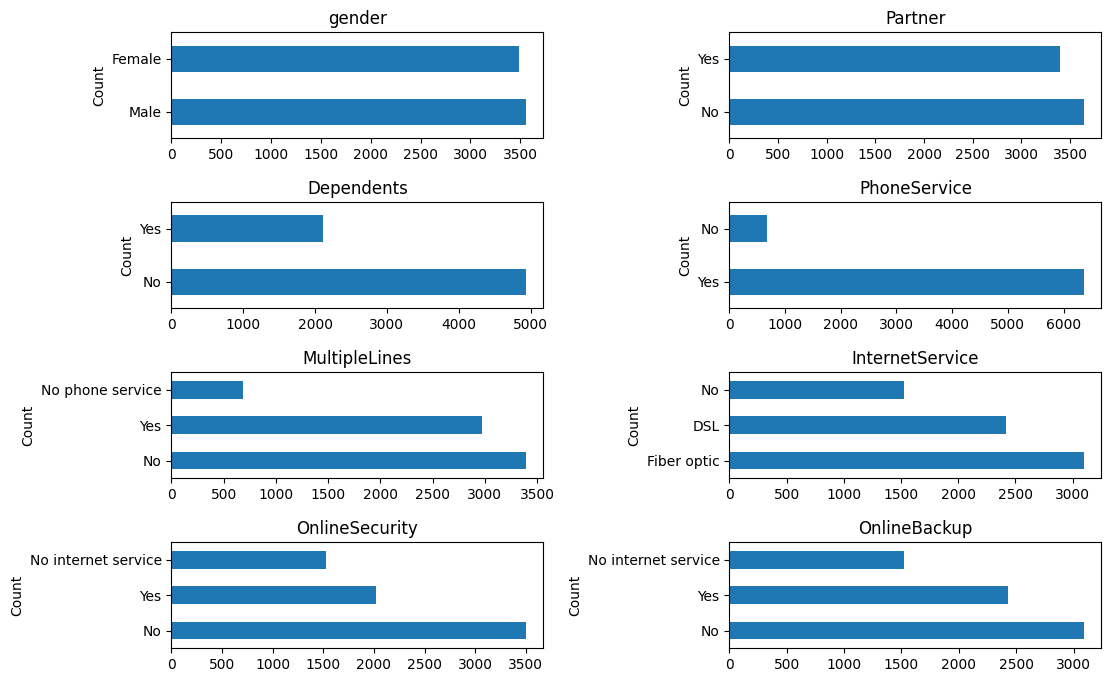

In [68]:
# Plots for categorical Variables

# Exclude the first variable and TotalCharges variables
cat_vars = [var for var in cat_vars if var not in ['customerID', 'TotalCharges']]  

cat_vars1 = cat_vars

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars1[0:8]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

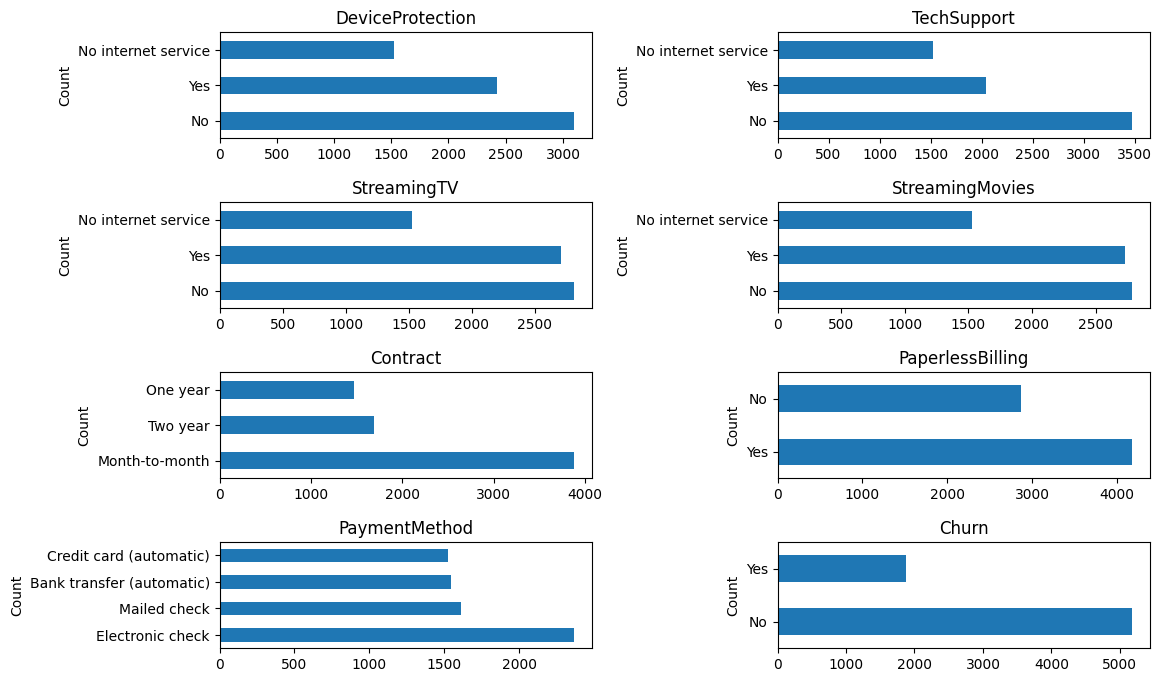

In [69]:
# Plots for categorical Variables
cat_vars2 = cat_vars  # Exclude the first variable and last 2 variables

n_rows = 4  # Number of subplot rows
n_cols = 2  # Number of subplot columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D axes array for easier indexing

# Iterate over the categorical variables and create the plots
for i, var in enumerate(cat_vars2[8:16]):
    ax = axes[i]  # Select the current subplot
    data[var].value_counts().plot(kind='barh', ax=ax)  # Plot the value counts as a bar chart
    ax.set_title(var)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove x-axis label to avoid clutter
    ax.set_ylabel('Count')  # Set y-axis label

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5) 

# Show the plots
plt.show()

### Interpertation of  Categorical Variables

- Gender and Partner are evenly distributed
- Most variables are almost evenly distributed with the exception of **Phone Service** where majority of clients have a Phone service
- Variable classification **"No Phone Service"** will be regarded as **No**

## 2. Numeric Variables

In [96]:
# Identify Numeric variables

num_vars = []
for column in data.columns:
    if data.dtypes[column] != 'object':  # Check if the data type is 'object'
        num_vars.append(column)
        
# Add variable total charges
num_vars += ['TotalCharges']
num_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Text(0.5, 1.0, 'Histogram Plot ~ Monthly Charges')

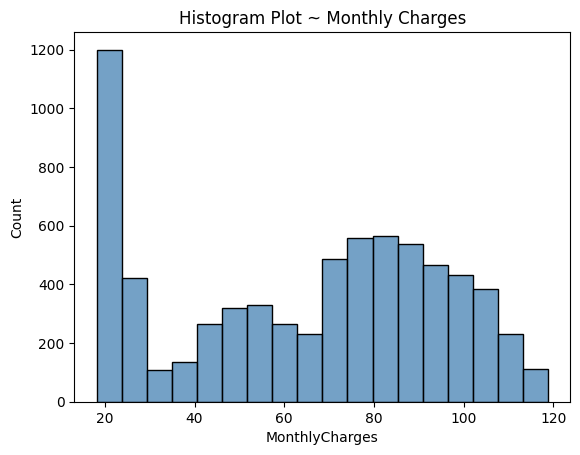

In [111]:
# plots for numeric variables
sns.histplot(data=data, x='MonthlyCharges', color='steelblue').set_title('Histogram Plot ~ Monthly Charges')

Text(0.5, 1.0, 'KdePlot ~ Total Charges')

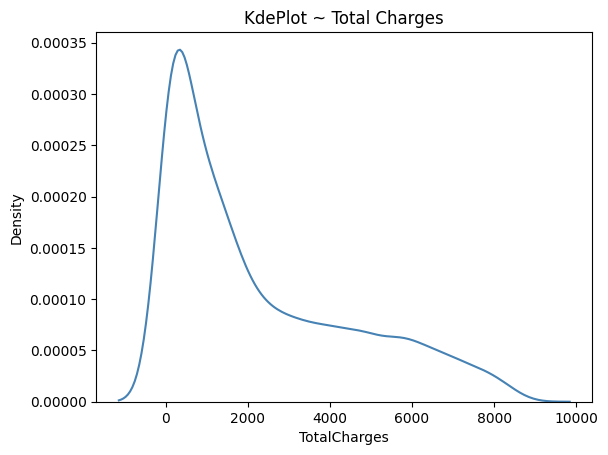

In [109]:
# total Charges
# remove non numeric values in Total Charges variable
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
numeric_data = data[data['TotalCharges'].notnull()]

sns.kdeplot(numeric_data['TotalCharges'], color='steelblue').set_title('KdePlot ~ Total Charges')


Text(0.5, 1.0, 'Histogram Plot ~ tenure')

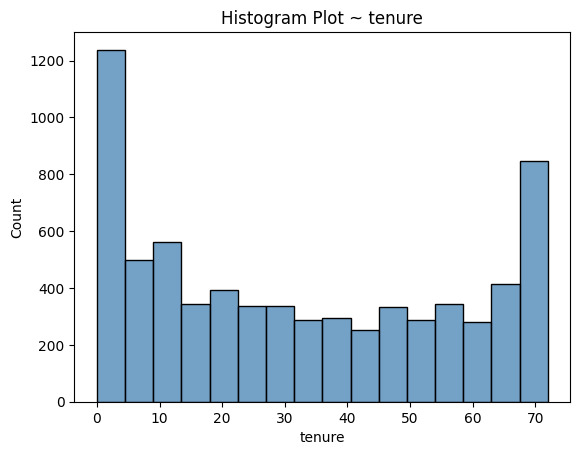

In [112]:
# tenure
sns.histplot(data=data, x='tenure', color='steelblue').set_title('Histogram Plot ~ tenure')

Text(0.5, 1.0, 'Count Plot ~ SeniorCitizen')

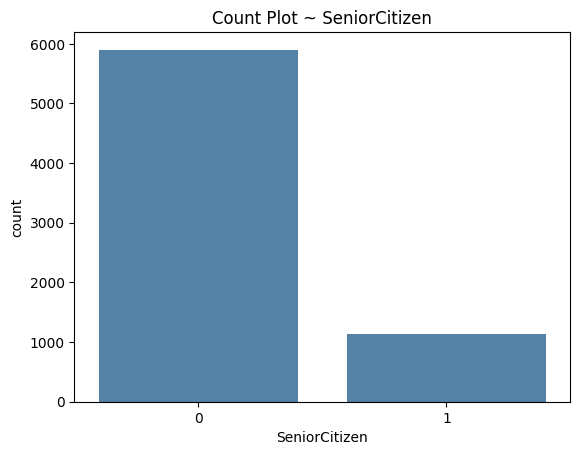

In [113]:
# tenure
sns.countplot(data=data, x='SeniorCitizen', color='steelblue').set_title('Count Plot ~ SeniorCitizen')

### Interpertation of  Numeric Variables

- using the kde plot, the distribution of **Total Charges** is skewed to right
- The distribution of citizens is imbalanced.

# Step 2 - Identifying relationships